In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import keras
from keras.models import Model
from keras.layers import *
from keras import optimizers
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler

Using TensorFlow backend.


In [2]:
df = pd.read_csv('Amreli NRM data for model building2.csv')

df = df[df['Heat number (life number)']>1]    
df = df.reset_index(drop=True)
df['Number of capacitors removed'].fillna(0, inplace=True)

In [3]:
df

,campaign,Heat number (life number),Total Heat Time previous (minutes),Total Heat Time (minutes),Scrap (MT),Sponge (MT),Hot Heel (MT),Alloys (MT),Input (MT),Final C%,...,Voltage,Frequency,Rating of the furnace (KW),Melt rate (MT/Hr),Efficiency (MT/KWH),Number of capacitors removed,Refractory lining before heating,Refractory lining after heating,Previous Input,Previous Output
0,1,2,130,135,11,23.531707,0,0.390,34.921707,0.204,...,3740,274,3740,13.540444,0.001500,0.0,6.687037,6.624074,39.747073,32.643
1,1,3,135,125,12,19.678049,0,0.394,32.072049,0.203,...,3731,275,3731,13.579200,0.001582,0.0,6.624074,6.561111,34.921707,30.466
2,1,4,125,110,12,16.956098,0,0.450,29.406098,0.192,...,3764,270,3764,14.244000,0.001628,0.0,6.561111,6.498148,32.072049,28.290
3,1,5,110,115,13,17.032927,0,0.495,30.527927,0.196,...,3756,274,3756,14.192348,0.001568,0.0,6.498148,6.435185,29.406098,26.114
4,1,6,115,105,15,16.000000,0,0.470,31.470000,0.194,...,3675,275,3675,16.165714,0.001669,0.0,6.435185,6.372222,30.527927,27.202
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
435,9,59,115,130,0,34.835366,0,0.635,35.470366,0.249,...,3366,362,3366,13.476923,0.001602,8.0,4.141535,4.096561,30.009024,24.710
436,9,60,130,110,0,31.128049,0,0.585,31.713049,0.236,...,3498,328,3498,14.241818,0.001685,6.0,4.096561,4.051588,35.470366,29.200
437,9,61,110,105,0,30.079268,0,0.365,30.444268,0.212,...,3428,351,3428,14.302857,0.001637,8.0,4.051588,4.006614,31.713049,26.110
438,9,62,105,145,0,37.487805,0,0.710,38.197805,0.226,...,3210,368,3210,13.013793,0.001575,8.0,4.006614,3.961641,30.444268,25.030


In [4]:
df['Efficiency (MT/KWH)'] = df['Efficiency (MT/KWH)']*1000
df['Previous Output'] = df['Previous Output']*1000
df['Previous Input'] = df['Previous Input']*1000
df['Scrap (MT)'] = df['Scrap (MT)']*1000
df['Sponge (MT)'] = df['Sponge (MT)']*1000
df['Alloys (MT)'] = df['Alloys (MT)']*1000

In [5]:
input_columns = ['Scrap (MT)', 'Sponge (MT)', 'Hot Heel (MT)', 'Alloys (MT)','Number of capacitors removed','Tapping Temperature (C)','Refractory lining before heating',
                 'Previous Voltage', 'Previous Frequency','Previous Input', 'Previous Output','Input energy previous (KWH)']
output_columns = ['Efficiency (MT/KWH)']

X = df[input_columns]
X_train = X.iloc[:318,:].values
X_test = X.iloc[318:,:].values
y = df[output_columns]
y_train = y.iloc[:318,:].values
y_test = y.iloc[318:,:].values

scaler1 = MinMaxScaler()
normalized_X_train = scaler1.fit_transform(X_train)
normalized_X_test = scaler1.transform(X_test)

scaler2 = MinMaxScaler()
normalized_y_train = scaler2.fit_transform(y_train)
normalized_y_test = scaler2.transform(y_test)

In [6]:
## Keras NN
## model = Sequential()
n_input = X_train.shape[1] # number of features
n_hidden_1 = 500
n_hidden_2 = 100
n_hidden_3 = 50
n_hidden_4 = 150
n_hidden_5 = 100
n_hidden_6 = 50
n_hidden_7 = 25
num_digits = 1
n_output = 1

Inp = Input(shape=(n_input,))
x = Dense(n_hidden_1, activation='relu')(Inp)
x = Dense(n_hidden_2, activation='relu', name = "Hidden_Layer_2")(x)
x = Dense(n_hidden_3, activation='relu', name = "Hidden_Layer_3")(x)
# x = Dense(n_hidden_4, activation='relu', name = "Hidden_Layer_4")(x)
# x = Dense(n_hidden_5, activation='relu', name = "Hidden_Layer_5")(x)
# x = Dense(n_hidden_6, activation='relu', name = "Hidden_Layer_6")(x)
# x = Dense(n_hidden_7, activation='relu', name = "Hidden_Layer_7")(x)

output = Dense(num_digits, activation='linear', name = "Output_Layer")(x)
    
model = Model(Inp, output)
model.summary() 
learning_rate = 0.001
training_epochs = 500
batch_size = 5
sgd = optimizers.SGD(lr=learning_rate)
model.compile(loss=tf.keras.losses.MeanSquaredError(),
                  optimizer='adam',
                  metrics=['mse'])
    
history = model.fit(normalized_X_train, normalized_y_train,
                         batch_size = batch_size,
                         epochs = training_epochs,
                         verbose = 2)


pred_train = model.predict(normalized_X_train)
y_pred_train = scaler2.inverse_transform(pred_train)
pred_test = model.predict(normalized_X_test)
y_pred_test = scaler2.inverse_transform(pred_test)

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 12)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 500)               6500      
_________________________________________________________________
Hidden_Layer_2 (Dense)       (None, 100)               50100     
_________________________________________________________________
Hidden_Layer_3 (Dense)       (None, 50)                5050      
_________________________________________________________________
Output_Layer (Dense)         (None, 1)                 51        
Total params: 61,701
Trainable params: 61,701
Non-trainable params: 0
_________________________________________________________________
Epoch 1/500
 - 1s - loss: 0.0081 - mse: 0.0081
Epoch 2/500
 - 0s - loss: 0.0041 - mse: 0.0041
Epoch 3/500
 - 0s - loss: 0

Epoch 150/500
 - 0s - loss: 0.0019 - mse: 0.0019
Epoch 151/500
 - 0s - loss: 0.0019 - mse: 0.0019
Epoch 152/500
 - 0s - loss: 0.0020 - mse: 0.0020
Epoch 153/500
 - 0s - loss: 0.0020 - mse: 0.0020
Epoch 154/500
 - 0s - loss: 0.0020 - mse: 0.0020
Epoch 155/500
 - 0s - loss: 0.0023 - mse: 0.0023
Epoch 156/500
 - 0s - loss: 0.0026 - mse: 0.0026
Epoch 157/500
 - 0s - loss: 0.0020 - mse: 0.0020
Epoch 158/500
 - 0s - loss: 0.0019 - mse: 0.0019
Epoch 159/500
 - 0s - loss: 0.0020 - mse: 0.0020
Epoch 160/500
 - 0s - loss: 0.0019 - mse: 0.0019
Epoch 161/500
 - 0s - loss: 0.0018 - mse: 0.0018
Epoch 162/500
 - 0s - loss: 0.0020 - mse: 0.0020
Epoch 163/500
 - 0s - loss: 0.0019 - mse: 0.0019
Epoch 164/500
 - 0s - loss: 0.0021 - mse: 0.0021
Epoch 165/500
 - 0s - loss: 0.0018 - mse: 0.0018
Epoch 166/500
 - 0s - loss: 0.0019 - mse: 0.0019
Epoch 167/500
 - 0s - loss: 0.0019 - mse: 0.0019
Epoch 168/500
 - 0s - loss: 0.0019 - mse: 0.0019
Epoch 169/500
 - 0s - loss: 0.0019 - mse: 0.0019
Epoch 170/500
 - 0s 

 - 0s - loss: 0.0016 - mse: 0.0016
Epoch 318/500
 - 0s - loss: 0.0017 - mse: 0.0017
Epoch 319/500
 - 0s - loss: 0.0016 - mse: 0.0016
Epoch 320/500
 - 0s - loss: 0.0014 - mse: 0.0014
Epoch 321/500
 - 0s - loss: 0.0020 - mse: 0.0020
Epoch 322/500
 - 0s - loss: 0.0021 - mse: 0.0021
Epoch 323/500
 - 0s - loss: 0.0023 - mse: 0.0023
Epoch 324/500
 - 0s - loss: 0.0025 - mse: 0.0025
Epoch 325/500
 - 0s - loss: 0.0019 - mse: 0.0019
Epoch 326/500
 - 0s - loss: 0.0018 - mse: 0.0018
Epoch 327/500
 - 0s - loss: 0.0015 - mse: 0.0015
Epoch 328/500
 - 0s - loss: 0.0014 - mse: 0.0014
Epoch 329/500
 - 0s - loss: 0.0016 - mse: 0.0016
Epoch 330/500
 - 0s - loss: 0.0018 - mse: 0.0018
Epoch 331/500
 - 0s - loss: 0.0013 - mse: 0.0013
Epoch 332/500
 - 0s - loss: 0.0015 - mse: 0.0015
Epoch 333/500
 - 0s - loss: 0.0017 - mse: 0.0017
Epoch 334/500
 - 0s - loss: 0.0018 - mse: 0.0018
Epoch 335/500
 - 0s - loss: 0.0014 - mse: 0.0014
Epoch 336/500
 - 0s - loss: 0.0014 - mse: 0.0014
Epoch 337/500
 - 0s - loss: 0.0015

 - 0s - loss: 0.0018 - mse: 0.0018
Epoch 484/500
 - 0s - loss: 0.0014 - mse: 0.0014
Epoch 485/500
 - 0s - loss: 0.0018 - mse: 0.0018
Epoch 486/500
 - 0s - loss: 0.0014 - mse: 0.0014
Epoch 487/500
 - 0s - loss: 0.0011 - mse: 0.0011
Epoch 488/500
 - 0s - loss: 7.3969e-04 - mse: 7.3969e-04
Epoch 489/500
 - 0s - loss: 7.5245e-04 - mse: 7.5245e-04
Epoch 490/500
 - 0s - loss: 0.0019 - mse: 0.0019
Epoch 491/500
 - 0s - loss: 0.0018 - mse: 0.0018
Epoch 492/500
 - 0s - loss: 0.0016 - mse: 0.0016
Epoch 493/500
 - 0s - loss: 0.0017 - mse: 0.0017
Epoch 494/500
 - 0s - loss: 0.0011 - mse: 0.0011
Epoch 495/500
 - 0s - loss: 9.1821e-04 - mse: 9.1821e-04
Epoch 496/500
 - 0s - loss: 0.0017 - mse: 0.0017
Epoch 497/500
 - 0s - loss: 0.0011 - mse: 0.0011
Epoch 498/500
 - 0s - loss: 0.0012 - mse: 0.0012
Epoch 499/500
 - 0s - loss: 0.0020 - mse: 0.0020
Epoch 500/500
 - 0s - loss: 0.0016 - mse: 0.0016


In [7]:
for i in range(num_digits):
    print(output_columns[i])
    print("Train score is {}".format(mean_squared_error(y_train[:,i], y_pred_train[:,i])))
    print("Test score is {}".format(mean_squared_error(y_test[:,i], y_pred_test[:,i])))
    print("R2 score is {}".format(r2_score(y_test[:,i], y_pred_test[:,i])))
    print("Train NMSE score is {}".format(np.sum(np.square(y_pred_train[:,i]-y_train[:,i]))/np.sum(np.square(y_train[:,i]-np.mean(y_train[:,i])))*100))
    print("Test NMSE score is {}".format(np.sum(np.square(y_pred_test[:,i]-y_test[:,i]))/np.sum(np.square(y_test[:,i]-np.mean(y_test[:,i])))*100))

Efficiency (MT/KWH)
Train score is 0.01011594683353794
Test score is 0.009986081100860798
R2 score is -1.4342905682206957
Train NMSE score is 35.582961878518645
Test NMSE score is 243.42905682206955


In [8]:
y_pred_train = y_pred_train.reshape(318,)
y_pred_test = y_pred_test.reshape(122,)
y = np.concatenate((y_pred_train, y_pred_test),axis=0)
df['Predicted Efficiency'] = y

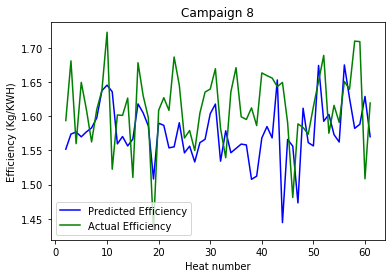

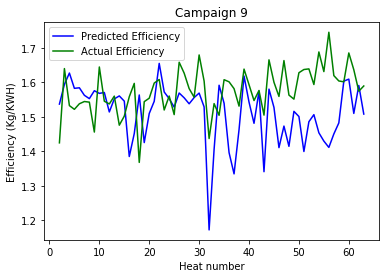

In [9]:
camp = [8,9]

for c in camp:
    dfc = df[df['campaign']==c]
    dfc = dfc.reset_index(drop=True)
    plt.plot(dfc['Heat number (life number)'],dfc['Predicted Efficiency'],c='b');
    plt.plot(dfc['Heat number (life number)'],dfc['Efficiency (MT/KWH)'],c='g');
    plt.xlabel('Heat number');
    plt.ylabel('Efficiency (Kg/KWH)');
    plt.title('Campaign {}'.format(c));
    plt.legend(['Predicted Efficiency','Actual Efficiency']);
    plt.show();

In [10]:
from scipy.optimize import minimize, LinearConstraint
dfc = df[df['campaign']==9]
dfc = dfc.reset_index(drop=True)
R = np.array(dfc['Refractory lining before heating'])

In [11]:
# Setting initial condition

R0 = np.ones((dfc.shape[0],1))*2
# R0 = R

In [12]:
def objective_function(Coef):
    dfc['Refractory lining before heating'] = Coef
    
    input_columns = ['Scrap (MT)', 'Sponge (MT)', 'Hot Heel (MT)', 'Alloys (MT)','Number of capacitors removed','Tapping Temperature (C)','Refractory lining before heating',
             'Previous Voltage', 'Previous Frequency','Previous Input', 'Previous Output','Input energy previous (KWH)']
    output_columns = ['Efficiency (MT/KWH)']
    X = dfc[input_columns]
    X_test = X.iloc[:,:].values
    y = dfc[output_columns]
    y_test = y.iloc[:,:].values
    normalized_X_test = scaler1.transform(X_test)
    normalized_y_test = scaler2.transform(y_test)
    pred_test = model.predict(normalized_X_test)
    y_pred_test = scaler2.inverse_transform(pred_test)
    sum_of_squares = np.sum(np.square(y_test-y_pred_test))
    return sum_of_squares

In [13]:
R

array([6.70502646, 6.66005292, 6.61507938, 6.57010584, 6.5251323 ,
       6.48015876, 6.43518522, 6.39021168, 6.34523814, 6.3002646 ,
       6.25529106, 6.21031752, 6.16534398, 6.12037044, 6.0753969 ,
       6.03042336, 5.98544982, 5.94047629, 5.89550275, 5.85052921,
       5.80555567, 5.76058213, 5.71560859, 5.67063505, 5.62566151,
       5.58068797, 5.53571443, 5.49074089, 5.44576735, 5.40079381,
       5.35582027, 5.31084673, 5.26587319, 5.22089965, 5.17592611,
       5.13095257, 5.08597903, 5.04100549, 4.99603195, 4.95105841,
       4.90608487, 4.86111133, 4.81613779, 4.77116425, 4.72619071,
       4.68121717, 4.63624363, 4.59127009, 4.54629656, 4.50132302,
       4.45634948, 4.41137594, 4.3664024 , 4.32142886, 4.27645532,
       4.23148178, 4.18650824, 4.1415347 , 4.09656116, 4.05158762,
       4.00661408, 3.96164054])

In [14]:

def inequality(Coef):
    A = np.zeros((dfc.shape[0]-1,dfc.shape[0]))
#     A[0,0] = 1
    for i in range(dfc.shape[0]-1):
        A[i,i] = 1
        A[i,i+1] = -1
#     A[i+2,-1] = 1
 
    return np.matmul(A,Coef)-0.001



bounds = [(2, 6.8) for _ in range(dfc.shape[0])]
con1 = {'type':'ineq','fun':inequality}

con = [con1]






In [21]:
res = minimize(objective_function, x0 = R0, constraints=con,bounds=bounds,method='SLSQP',
               options={'disp': True})
    #options={'gtol': 1e-8, 'disp': True})
res

Optimization terminated successfully.    (Exit mode 0)
            Current function value: 0.5796378939870196
            Iterations: 6
            Function evaluations: 404
            Gradient evaluations: 6


     fun: 0.5796378939870196
     jac: array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
 message: 'Optimization terminated successfully.'
    nfev: 404
     nit: 6
    njev: 6
  status: 0
 success: True
       x: array([6.79647837, 6.79547827, 6.79447817, 6.79347807, 6.79247798,
       6.79147788, 6.79047778, 6.78947769, 6.78847759, 6.78747749,
       6.78647739, 6.7854773 , 6.7844772 , 6.7834771 , 6.78247701,
       6.78147043, 6.78047043, 6.77947043, 6.77847043, 6.77747043,
       6.77647043, 6.77547043, 6.77447043, 6.77347043, 6.77247043,
       6.77147043, 6.77047043, 6.76947043, 6.76847043, 6.76747043,
       6.76647043, 6.76547043, 4.26630045, 4.18815635, 4.11001178,
       4.03186411, 3.95370577, 3.87556167, 3.79741757, 3.7192734 ,
       3.64112572, 3.56

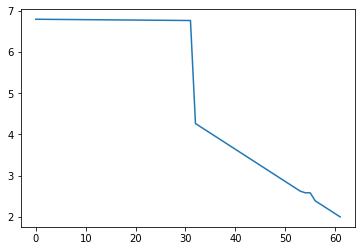

In [22]:
plt.figure()
plt.plot(res.x)

# Using Optimized profile for prediction 

In [24]:
dfc['Refractory lining before heating'] = res.x

In [25]:
dfc.columns

Index(['campaign', 'Heat number (life number)',
       'Total Heat Time previous (minutes)', 'Total Heat Time (minutes)',
       'Scrap (MT)', 'Sponge (MT)', 'Hot Heel (MT)', 'Alloys (MT)',
       'Input (MT)', 'Final C%', 'Tapping Temperature (C)', 'Output (MT)',
       'Input energy previous (KWH)', 'Input energy (KWH)', 'Previous Voltage',
       'Previous Frequency', 'Previous Rating of the Furnace', 'Voltage',
       'Frequency', 'Rating of the furnace (KW)', 'Melt rate (MT/Hr)',
       'Efficiency (MT/KWH)', 'Number of capacitors removed',
       'Refractory lining before heating', 'Refractory lining after heating',
       'Previous Input', 'Previous Output', 'Predicted Efficiency'],
      dtype='object')

In [26]:
input_columns = ['Scrap (MT)', 'Sponge (MT)', 'Hot Heel (MT)', 'Alloys (MT)','Number of capacitors removed','Tapping Temperature (C)','Refractory lining before heating',
             'Previous Voltage', 'Previous Frequency','Previous Input', 'Previous Output','Input energy previous (KWH)']
output_columns = ['Efficiency (MT/KWH)']
X = dfc[input_columns]
X_test = X.iloc[:,:].values
y = dfc[output_columns]
y_test = y.iloc[:,:].values
normalized_X_test = scaler1.transform(X_test)
normalized_y_test = scaler2.transform(y_test)
pred_test = model.predict(normalized_X_test)
y_pred_test = scaler2.inverse_transform(pred_test)

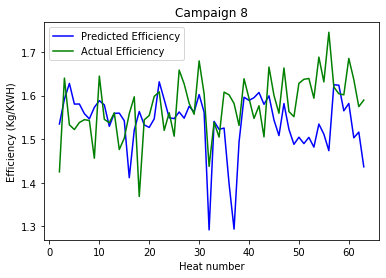

In [29]:
dfc['Predicted Efficiency'] = y_pred_test
plt.plot(dfc['Heat number (life number)'],dfc['Predicted Efficiency'],c='b');
plt.plot(dfc['Heat number (life number)'],dfc['Efficiency (MT/KWH)'],c='g');
plt.xlabel('Heat number');
plt.ylabel('Efficiency (Kg/KWH)');
plt.title('Campaign {}'.format(8));
plt.legend(['Predicted Efficiency','Actual Efficiency']);
plt.show();

In [30]:
for i in range(num_digits):
    print(output_columns[i])
    print("Test score is {}".format(mean_squared_error(y_test[:,i], y_pred_test[:,i])))
    print("R2 score is {}".format(r2_score(y_test[:,i], y_pred_test[:,i])))
    #print("Train NMSE score is {}".format(np.sum(np.square(y_pred_train[:,i]-y_train[:,i]))/np.sum(np.square(y_train[:,i]-np.mean(y_train[:,i])))*100))
    print("Test NMSE score is {}".format(np.sum(np.square(y_pred_test[:,i]-y_test[:,i]))/np.sum(np.square(y_test[:,i]-np.mean(y_test[:,i])))*100))

Efficiency (MT/KWH)
Test score is 0.009348998290113219
R2 score is -1.0722140889228862
Test NMSE score is 207.22140889228862


Text(0.5, 1.0, 'Initial vs Final lining thickness')

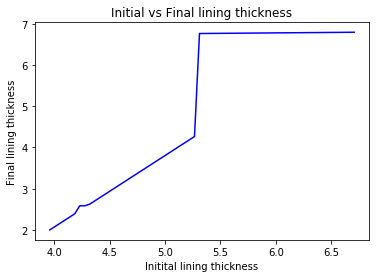

In [36]:
init = [6.70502646, 6.66005292, 6.61507938, 6.57010584, 6.5251323 ,
       6.48015876, 6.43518522, 6.39021168, 6.34523814, 6.3002646 ,
       6.25529106, 6.21031752, 6.16534398, 6.12037044, 6.0753969 ,
       6.03042336, 5.98544982, 5.94047629, 5.89550275, 5.85052921,
       5.80555567, 5.76058213, 5.71560859, 5.67063505, 5.62566151,
       5.58068797, 5.53571443, 5.49074089, 5.44576735, 5.40079381,
       5.35582027, 5.31084673, 5.26587319, 5.22089965, 5.17592611,
       5.13095257, 5.08597903, 5.04100549, 4.99603195, 4.95105841,
       4.90608487, 4.86111133, 4.81613779, 4.77116425, 4.72619071,
       4.68121717, 4.63624363, 4.59127009, 4.54629656, 4.50132302,
       4.45634948, 4.41137594, 4.3664024 , 4.32142886, 4.27645532,
       4.23148178, 4.18650824, 4.1415347 , 4.09656116, 4.05158762,
       4.00661408, 3.96164054]

final = [6.79647837, 6.79547827, 6.79447817, 6.79347807, 6.79247798,
       6.79147788, 6.79047778, 6.78947769, 6.78847759, 6.78747749,
       6.78647739, 6.7854773 , 6.7844772 , 6.7834771 , 6.78247701,
       6.78147043, 6.78047043, 6.77947043, 6.77847043, 6.77747043,
       6.77647043, 6.77547043, 6.77447043, 6.77347043, 6.77247043,
       6.77147043, 6.77047043, 6.76947043, 6.76847043, 6.76747043,
       6.76647043, 6.76547043, 4.26630045, 4.18815635, 4.11001178,
       4.03186411, 3.95370577, 3.87556167, 3.79741757, 3.7192734 ,
       3.64112572, 3.56297804, 3.48483037, 3.40668269, 3.32853501,
       3.25038733, 3.17223966, 3.09409198, 3.01592475, 2.93775915,
       2.85961505, 2.78147096, 2.70332686, 2.62518276, 2.58550146,
       2.58450146, 2.39074093, 2.31259071, 2.23444303, 2.15629535,
       2.07814768, 2.        ]

plt.plot(init, final, '-b');
plt.xlabel('Initital lining thickness')
plt.ylabel('Final lining thickness')
plt.title('Initial vs Final lining thickness')

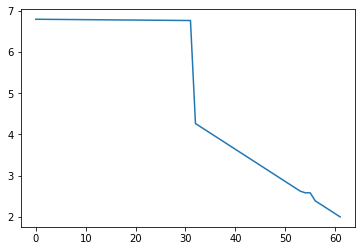

In [35]:
plt.plot(final)